In [10]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    f1_score,
)
import matplotlib.patches as patches

In [11]:
# Define paths and settings
TUNED_DIR = './results/new_tuned/'
ATTENTION_DIR = './results/attention/'
OUTPUT_DIR = './comparison_charts/'

num_classes = 9
classes = [
    'BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK'
]

# Load tuned model results
tuned_labels = np.load(f'{TUNED_DIR}all_labels.npy')
tuned_preds = np.load(f'{TUNED_DIR}all_preds.npy')
tuned_probs = np.load(f'{TUNED_DIR}all_probs.npy')
tuned_train_loss = np.load(f'{TUNED_DIR}train_loss_history.npy')
tuned_val_loss = np.load(f'{TUNED_DIR}val_loss_history.npy')
tuned_train_acc = np.load(f'{TUNED_DIR}train_acc_history.npy')
tuned_val_acc = np.load(f'{TUNED_DIR}val_acc_history.npy')

# Load attention model results
attn_labels = np.load(f'{ATTENTION_DIR}all_labels.npy')
attn_preds = np.load(f'{ATTENTION_DIR}all_preds.npy')
attn_probs = np.load(f'{ATTENTION_DIR}all_probs.npy')
attn_train_loss = np.load(f'{ATTENTION_DIR}train_loss_history.npy')
attn_val_loss = np.load(f'{ATTENTION_DIR}val_loss_history.npy')
attn_train_acc = np.load(f'{ATTENTION_DIR}train_acc_history.npy')
attn_val_acc = np.load(f'{ATTENTION_DIR}val_acc_history.npy')

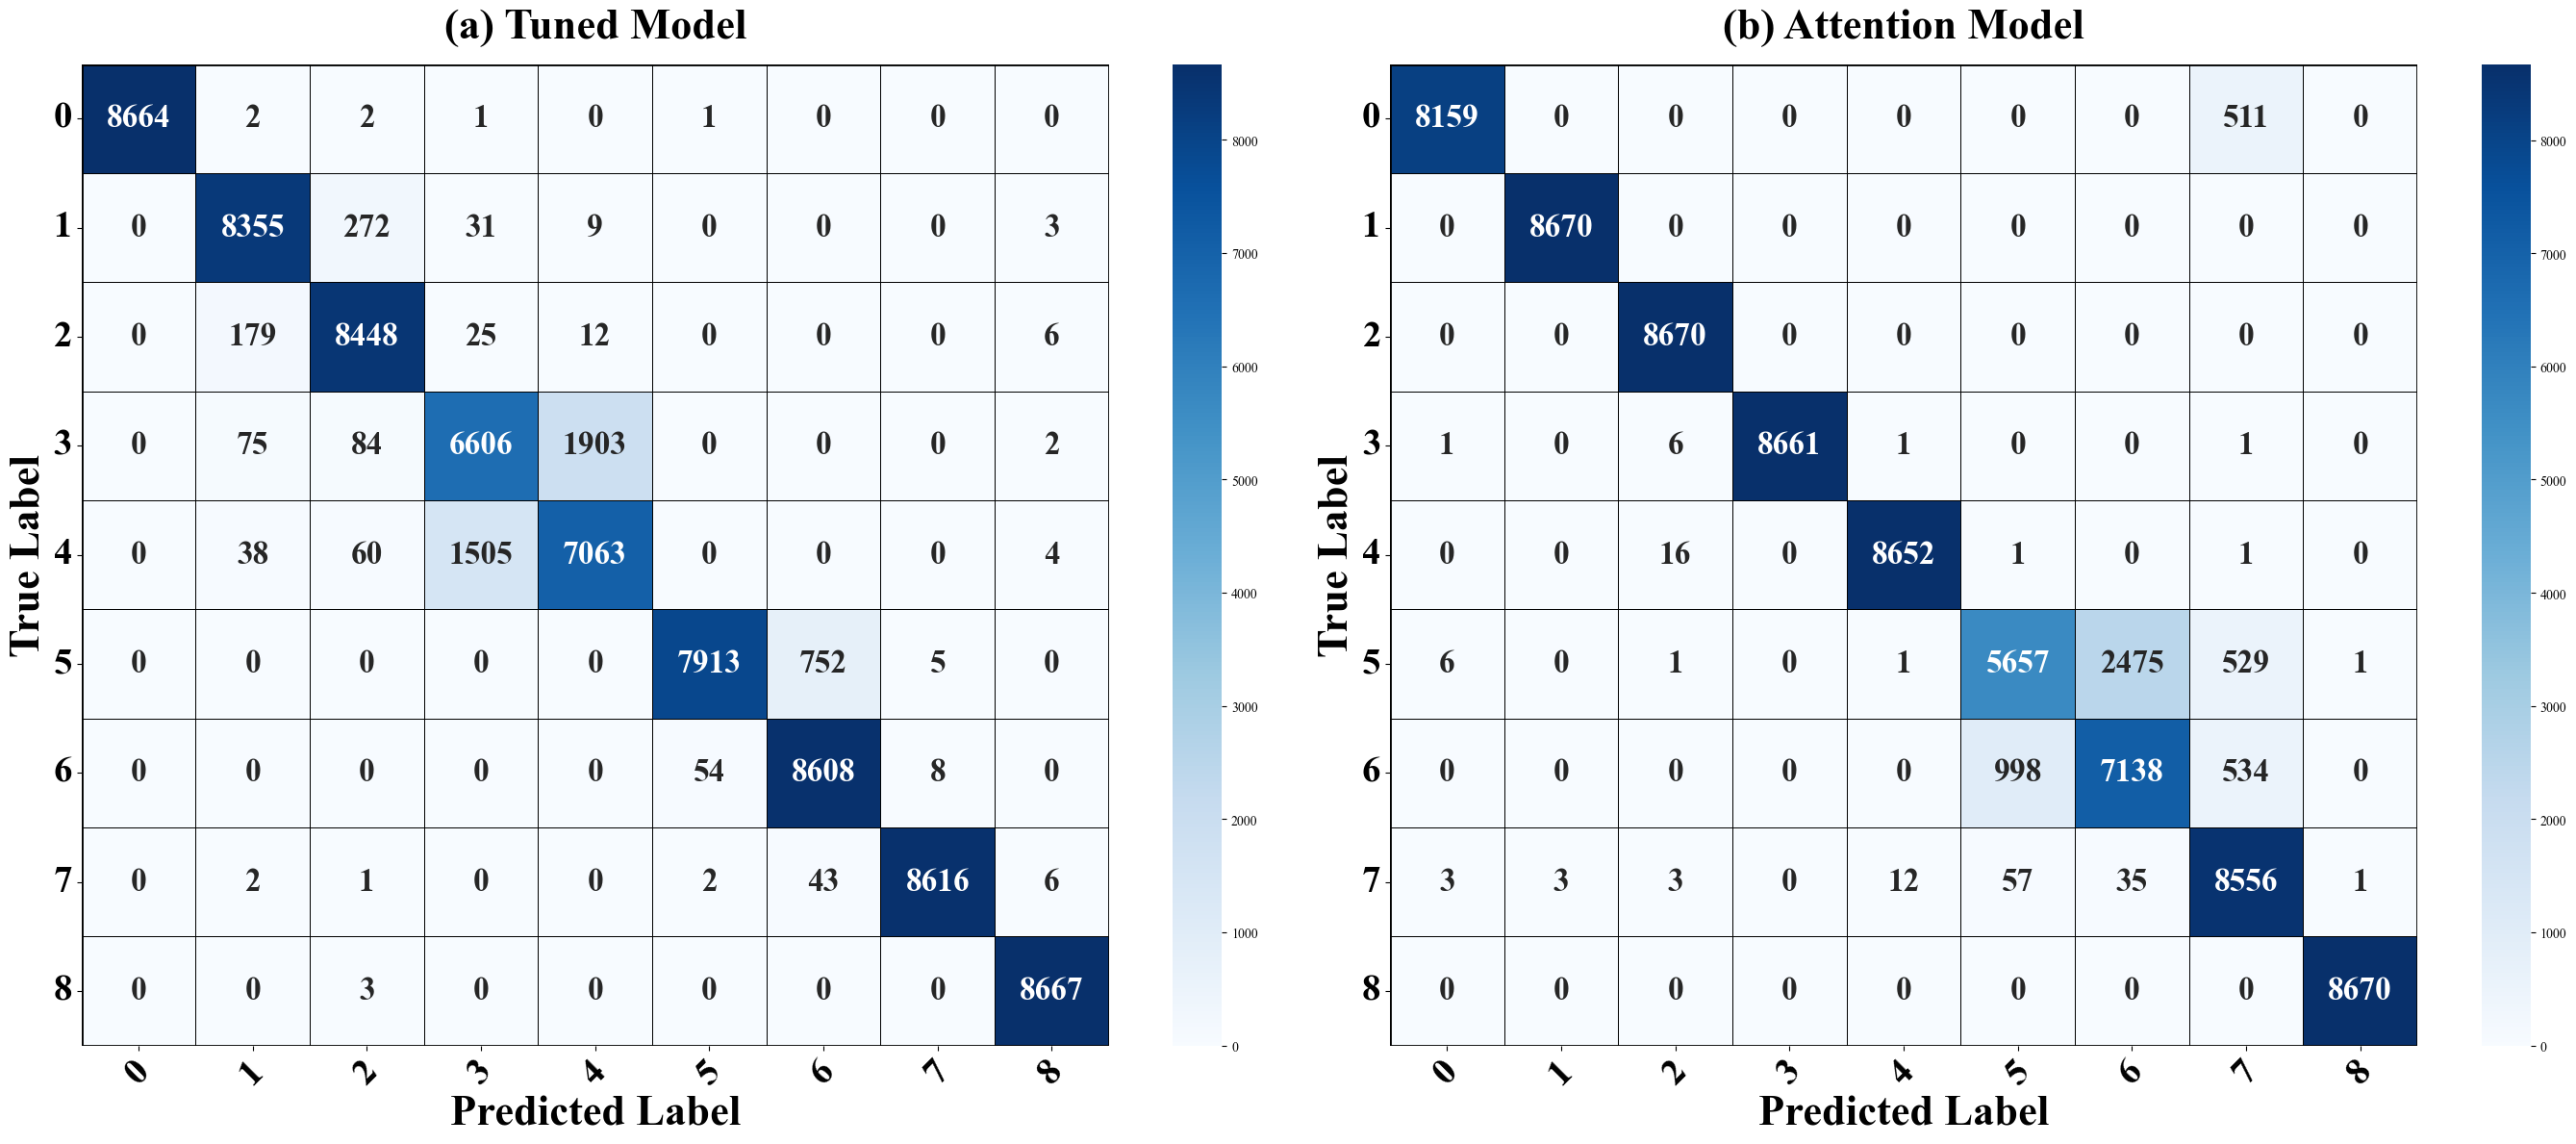

In [12]:
# Confusion Matrix Side-by-Side Comparison
tuned_conf_matrix = confusion_matrix(tuned_labels, tuned_preds)
attn_conf_matrix = confusion_matrix(attn_labels, attn_preds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12))

# Tuned Model Confusion Matrix
sns.heatmap(tuned_conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, 
            linecolor='black', annot_kws={"size": 24, "weight": "bold"}, ax=ax1)
ax1.add_patch(patches.Rectangle((0, 0), num_classes, num_classes, fill=False, edgecolor='black', lw=2))
ax1.set_xticks(np.arange(num_classes) + 0.5)
ax1.set_yticks(np.arange(num_classes) + 0.5)
ax1.set_xticklabels(range(num_classes), rotation=45, fontsize=28, fontweight='bold')
ax1.set_yticklabels(range(num_classes), rotation=0, fontsize=28, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=32, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=32, fontweight='bold')
ax1.set_title('(a) Tuned Model', fontsize=32, fontweight='bold', pad=20)

# Attention Model Confusion Matrix
sns.heatmap(attn_conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, 
            linecolor='black', annot_kws={"size": 24, "weight": "bold"}, ax=ax2)
ax2.add_patch(patches.Rectangle((0, 0), num_classes, num_classes, fill=False, edgecolor='black', lw=2))
ax2.set_xticks(np.arange(num_classes) + 0.5)
ax2.set_yticks(np.arange(num_classes) + 0.5)
ax2.set_xticklabels(range(num_classes), rotation=45, fontsize=28, fontweight='bold')
ax2.set_yticklabels(range(num_classes), rotation=0, fontsize=28, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=32, fontweight='bold')
ax2.set_xlabel('Predicted Label', fontsize=32, fontweight='bold')
ax2.set_title('(b) Attention Model', fontsize=32, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}comparison_confusion_matrix.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}comparison_confusion_matrix.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(f'{OUTPUT_DIR}comparison_confusion_matrix.svg', format='svg', bbox_inches='tight')
plt.show()

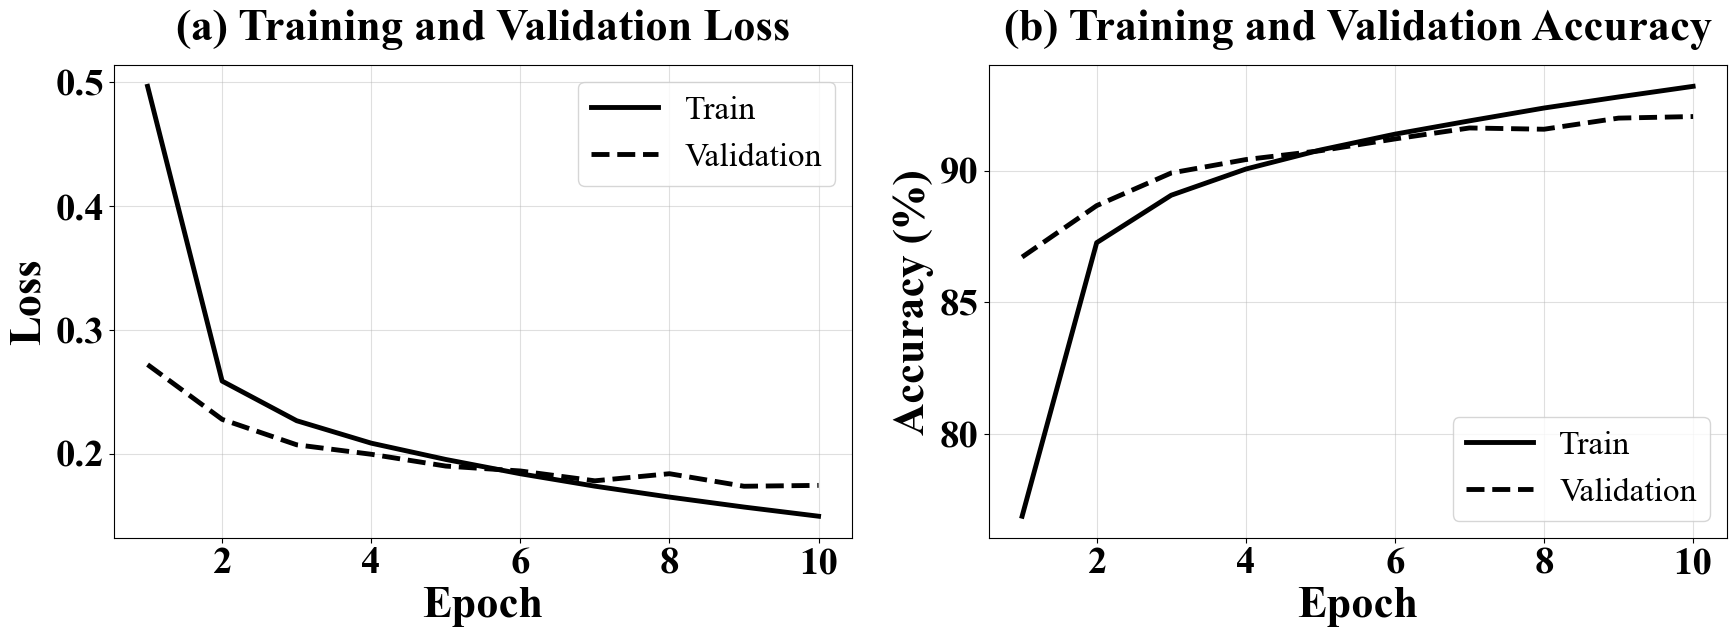

In [13]:
# Training History - Tuned Model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# (a) Training and Validation Loss
ax1.plot(range(1, len(tuned_train_loss)+1), tuned_train_loss, label='Train', linestyle='-', color='black', linewidth=3.5)
ax1.plot(range(1, len(tuned_val_loss)+1), tuned_val_loss, label='Validation', linestyle='--', color='black', linewidth=3.5)
ax1.set_xlabel('Epoch', fontsize=32, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=32, fontweight='bold')
ax1.tick_params(axis='both', labelsize=28)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
ax1.legend(fontsize=24)
ax1.set_title('(a) Training and Validation Loss', fontsize=32, fontweight='bold', pad=18)
ax1.grid(True, alpha=0.4)

# (b) Training and Validation Accuracy
ax2.plot(range(1, len(tuned_train_acc)+1), tuned_train_acc, label='Train', linestyle='-', color='black', linewidth=3.5)
ax2.plot(range(1, len(tuned_val_acc)+1), tuned_val_acc, label='Validation', linestyle='--', color='black', linewidth=3.5)
ax2.set_xlabel('Epoch', fontsize=32, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=32, fontweight='bold')
ax2.tick_params(axis='both', labelsize=28)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')
ax2.legend(fontsize=24)
ax2.set_title('(b) Training and Validation Accuracy', fontsize=32, fontweight='bold', pad=18)
ax2.grid(True, alpha=0.4)

plt.tight_layout(pad=3.0)
plt.savefig(f'{OUTPUT_DIR}tuned_loss_accuracy.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}tuned_loss_accuracy.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(f'{OUTPUT_DIR}tuned_loss_accuracy.svg', format='svg', bbox_inches='tight')
plt.show()

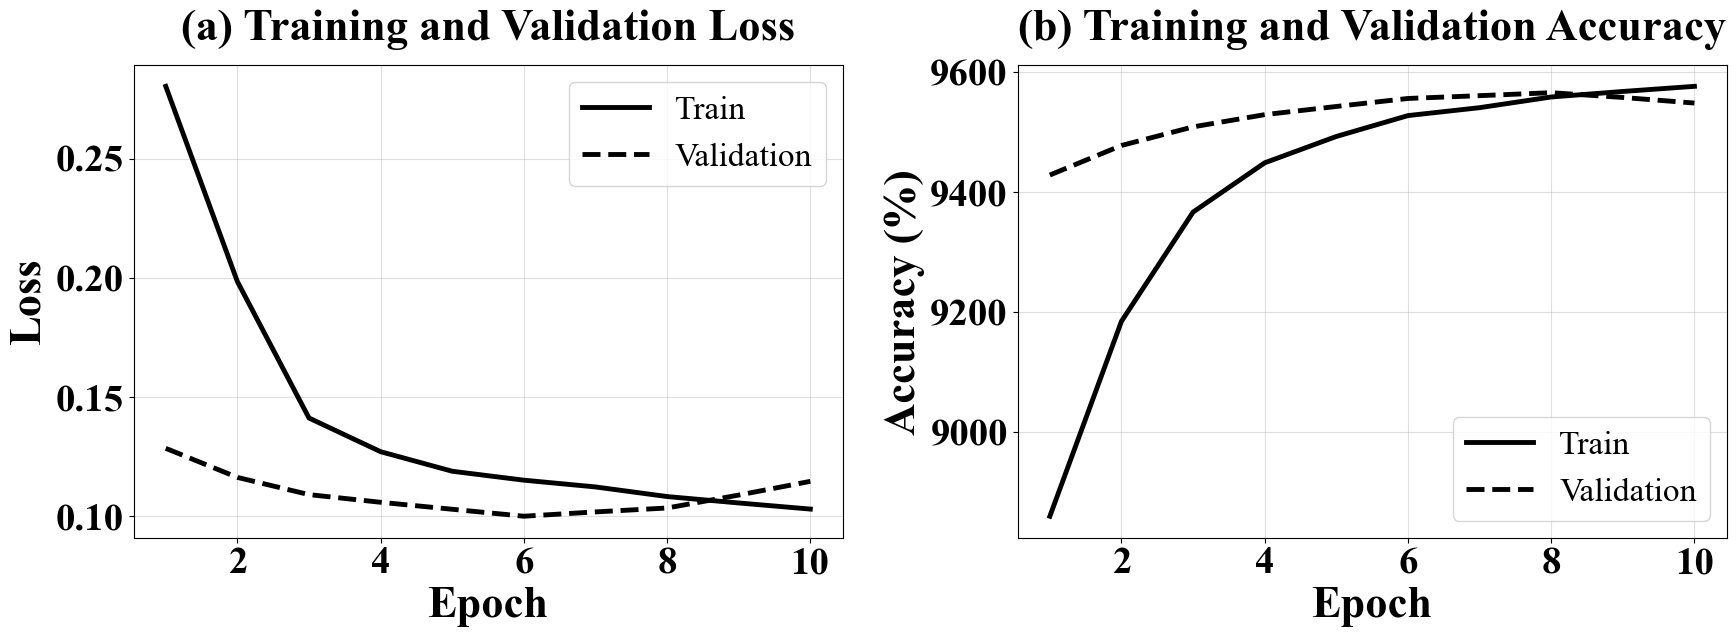

In [14]:
# Training History - Attention Model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# (a) Training and Validation Loss
ax1.plot(range(1, len(attn_train_loss)+1), attn_train_loss, label='Train', linestyle='-', color='black', linewidth=3.5)
ax1.plot(range(1, len(attn_val_loss)+1), attn_val_loss, label='Validation', linestyle='--', color='black', linewidth=3.5)
ax1.set_xlabel('Epoch', fontsize=32, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=32, fontweight='bold')
ax1.tick_params(axis='both', labelsize=28)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
ax1.legend(fontsize=24)
ax1.set_title('(a) Training and Validation Loss', fontsize=32, fontweight='bold', pad=18)
ax1.grid(True, alpha=0.4)

# (b) Training and Validation Accuracy
ax2.plot(range(1, len(attn_train_acc)+1), attn_train_acc*100, label='Train', linestyle='-', color='black', linewidth=3.5)
ax2.plot(range(1, len(attn_val_acc)+1), attn_val_acc*100, label='Validation', linestyle='--', color='black', linewidth=3.5)
ax2.set_xlabel('Epoch', fontsize=32, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=32, fontweight='bold')
ax2.tick_params(axis='both', labelsize=28)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')
ax2.legend(fontsize=24)
ax2.set_title('(b) Training and Validation Accuracy', fontsize=32, fontweight='bold', pad=18)
ax2.grid(True, alpha=0.4)

plt.tight_layout(pad=3.0)
plt.savefig(f'{OUTPUT_DIR}attention_loss_accuracy.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}attention_loss_accuracy.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(f'{OUTPUT_DIR}attention_loss_accuracy.svg', format='svg', bbox_inches='tight')
plt.show()

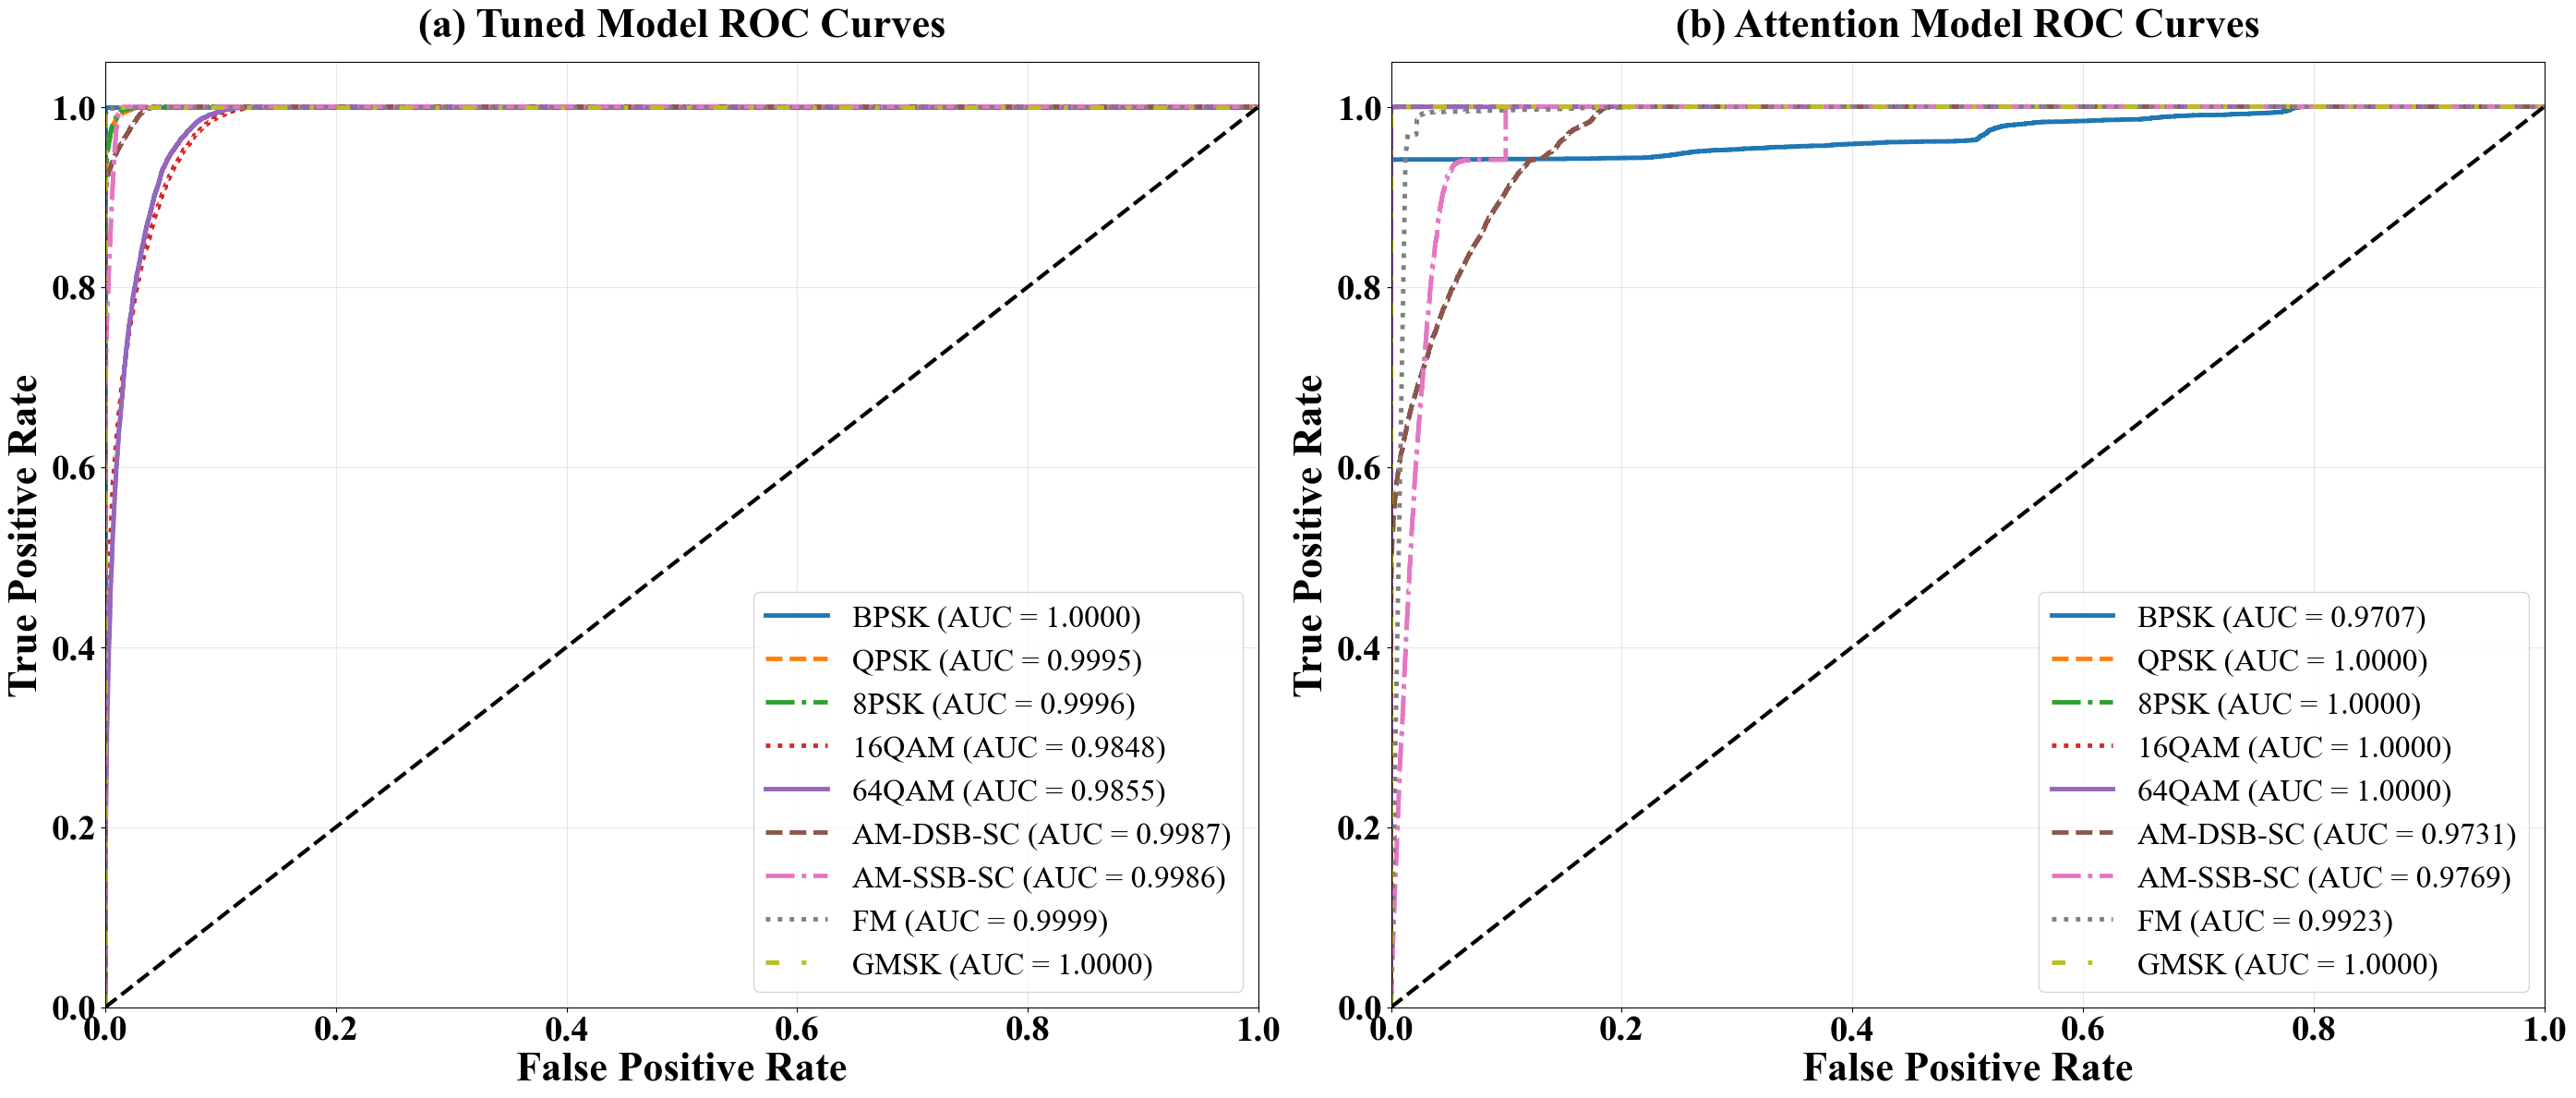

In [15]:
# ROC Curves Side-by-Side Comparison
tuned_fpr = dict()
tuned_tpr = dict()
tuned_roc_auc = dict()

attn_fpr = dict()
attn_tpr = dict()
attn_roc_auc = dict()

for i in range(num_classes):
    tuned_fpr[i], tuned_tpr[i], _ = roc_curve(tuned_labels == i, tuned_probs[:, i])
    tuned_roc_auc[i] = auc(tuned_fpr[i], tuned_tpr[i])
    
    attn_fpr[i], attn_tpr[i], _ = roc_curve(attn_labels == i, attn_probs[:, i])
    attn_roc_auc[i] = auc(attn_fpr[i], attn_tpr[i])

line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 5, 1, 5))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12))

# Tuned Model ROC
for i in range(num_classes):
    ax1.plot(tuned_fpr[i], tuned_tpr[i], lw=3.5,
             label=f'{classes[i]} (AUC = {tuned_roc_auc[i]:.4f})',
             linestyle=line_styles[i % len(line_styles)])
ax1.plot([0, 1], [0, 1], 'k--', lw=3)
ax1.tick_params(axis='both', labelsize=28)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=32, fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontsize=32, fontweight='bold')
ax1.legend(loc="lower right", fontsize=24)
ax1.set_title('(a) Tuned Model ROC Curves', fontsize=32, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)

# Attention Model ROC
for i in range(num_classes):
    ax2.plot(attn_fpr[i], attn_tpr[i], lw=3.5,
             label=f'{classes[i]} (AUC = {attn_roc_auc[i]:.4f})',
             linestyle=line_styles[i % len(line_styles)])
ax2.plot([0, 1], [0, 1], 'k--', lw=3)
ax2.tick_params(axis='both', labelsize=28)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=32, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=32, fontweight='bold')
ax2.legend(loc="lower right", fontsize=24)
ax2.set_title('(b) Attention Model ROC Curves', fontsize=32, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}comparison_roc_curves.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}comparison_roc_curves.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(f'{OUTPUT_DIR}comparison_roc_curves.svg', format='svg', bbox_inches='tight')
plt.show()

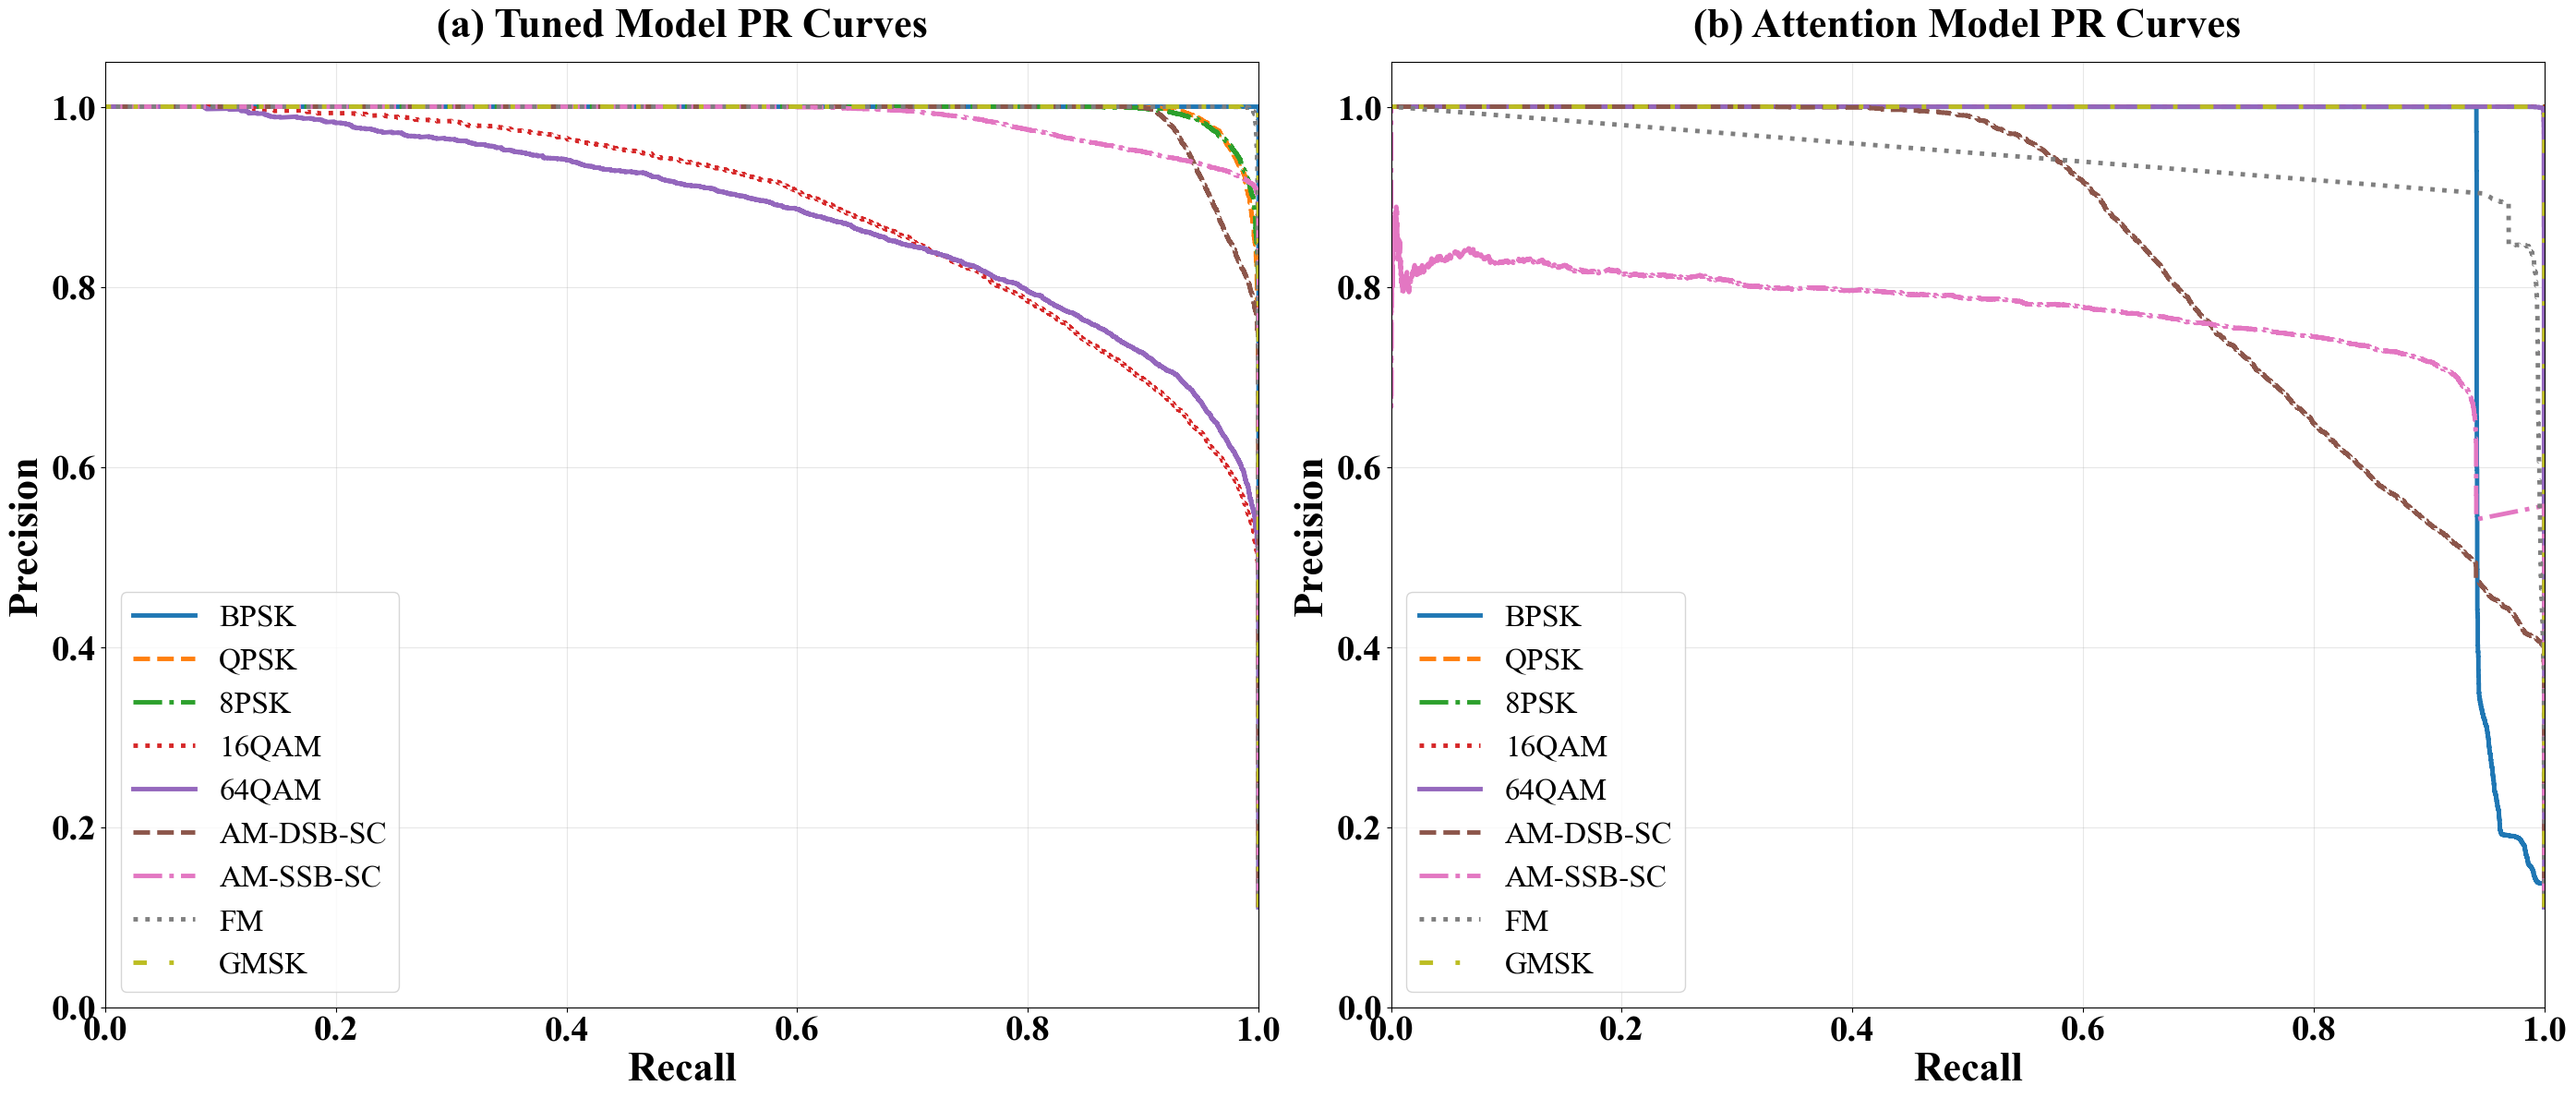

In [16]:
# Precision-Recall Curves Side-by-Side Comparison
tuned_precision = dict()
tuned_recall = dict()

attn_precision = dict()
attn_recall = dict()

for i in range(num_classes):
    tuned_precision[i], tuned_recall[i], _ = precision_recall_curve(tuned_labels == i, tuned_probs[:, i])
    attn_precision[i], attn_recall[i], _ = precision_recall_curve(attn_labels == i, attn_probs[:, i])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12))

# Tuned Model PR Curve
for i in range(num_classes):
    ax1.plot(tuned_recall[i], tuned_precision[i], lw=3.5,
             label=f'{classes[i]}', linestyle=line_styles[i % len(line_styles)])
ax1.tick_params(axis='both', labelsize=28)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('Recall', fontsize=32, fontweight='bold')
ax1.set_ylabel('Precision', fontsize=32, fontweight='bold')
ax1.legend(loc="lower left", fontsize=24)
ax1.set_title('(a) Tuned Model PR Curves', fontsize=32, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)

# Attention Model PR Curve
for i in range(num_classes):
    ax2.plot(attn_recall[i], attn_precision[i], lw=3.5,
             label=f'{classes[i]}', linestyle=line_styles[i % len(line_styles)])
ax2.tick_params(axis='both', labelsize=28)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall', fontsize=32, fontweight='bold')
ax2.set_ylabel('Precision', fontsize=32, fontweight='bold')
ax2.legend(loc="lower left", fontsize=24)
ax2.set_title('(b) Attention Model PR Curves', fontsize=32, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}comparison_precision_recall.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}comparison_precision_recall.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(f'{OUTPUT_DIR}comparison_precision_recall.svg', format='svg', bbox_inches='tight')
plt.show()

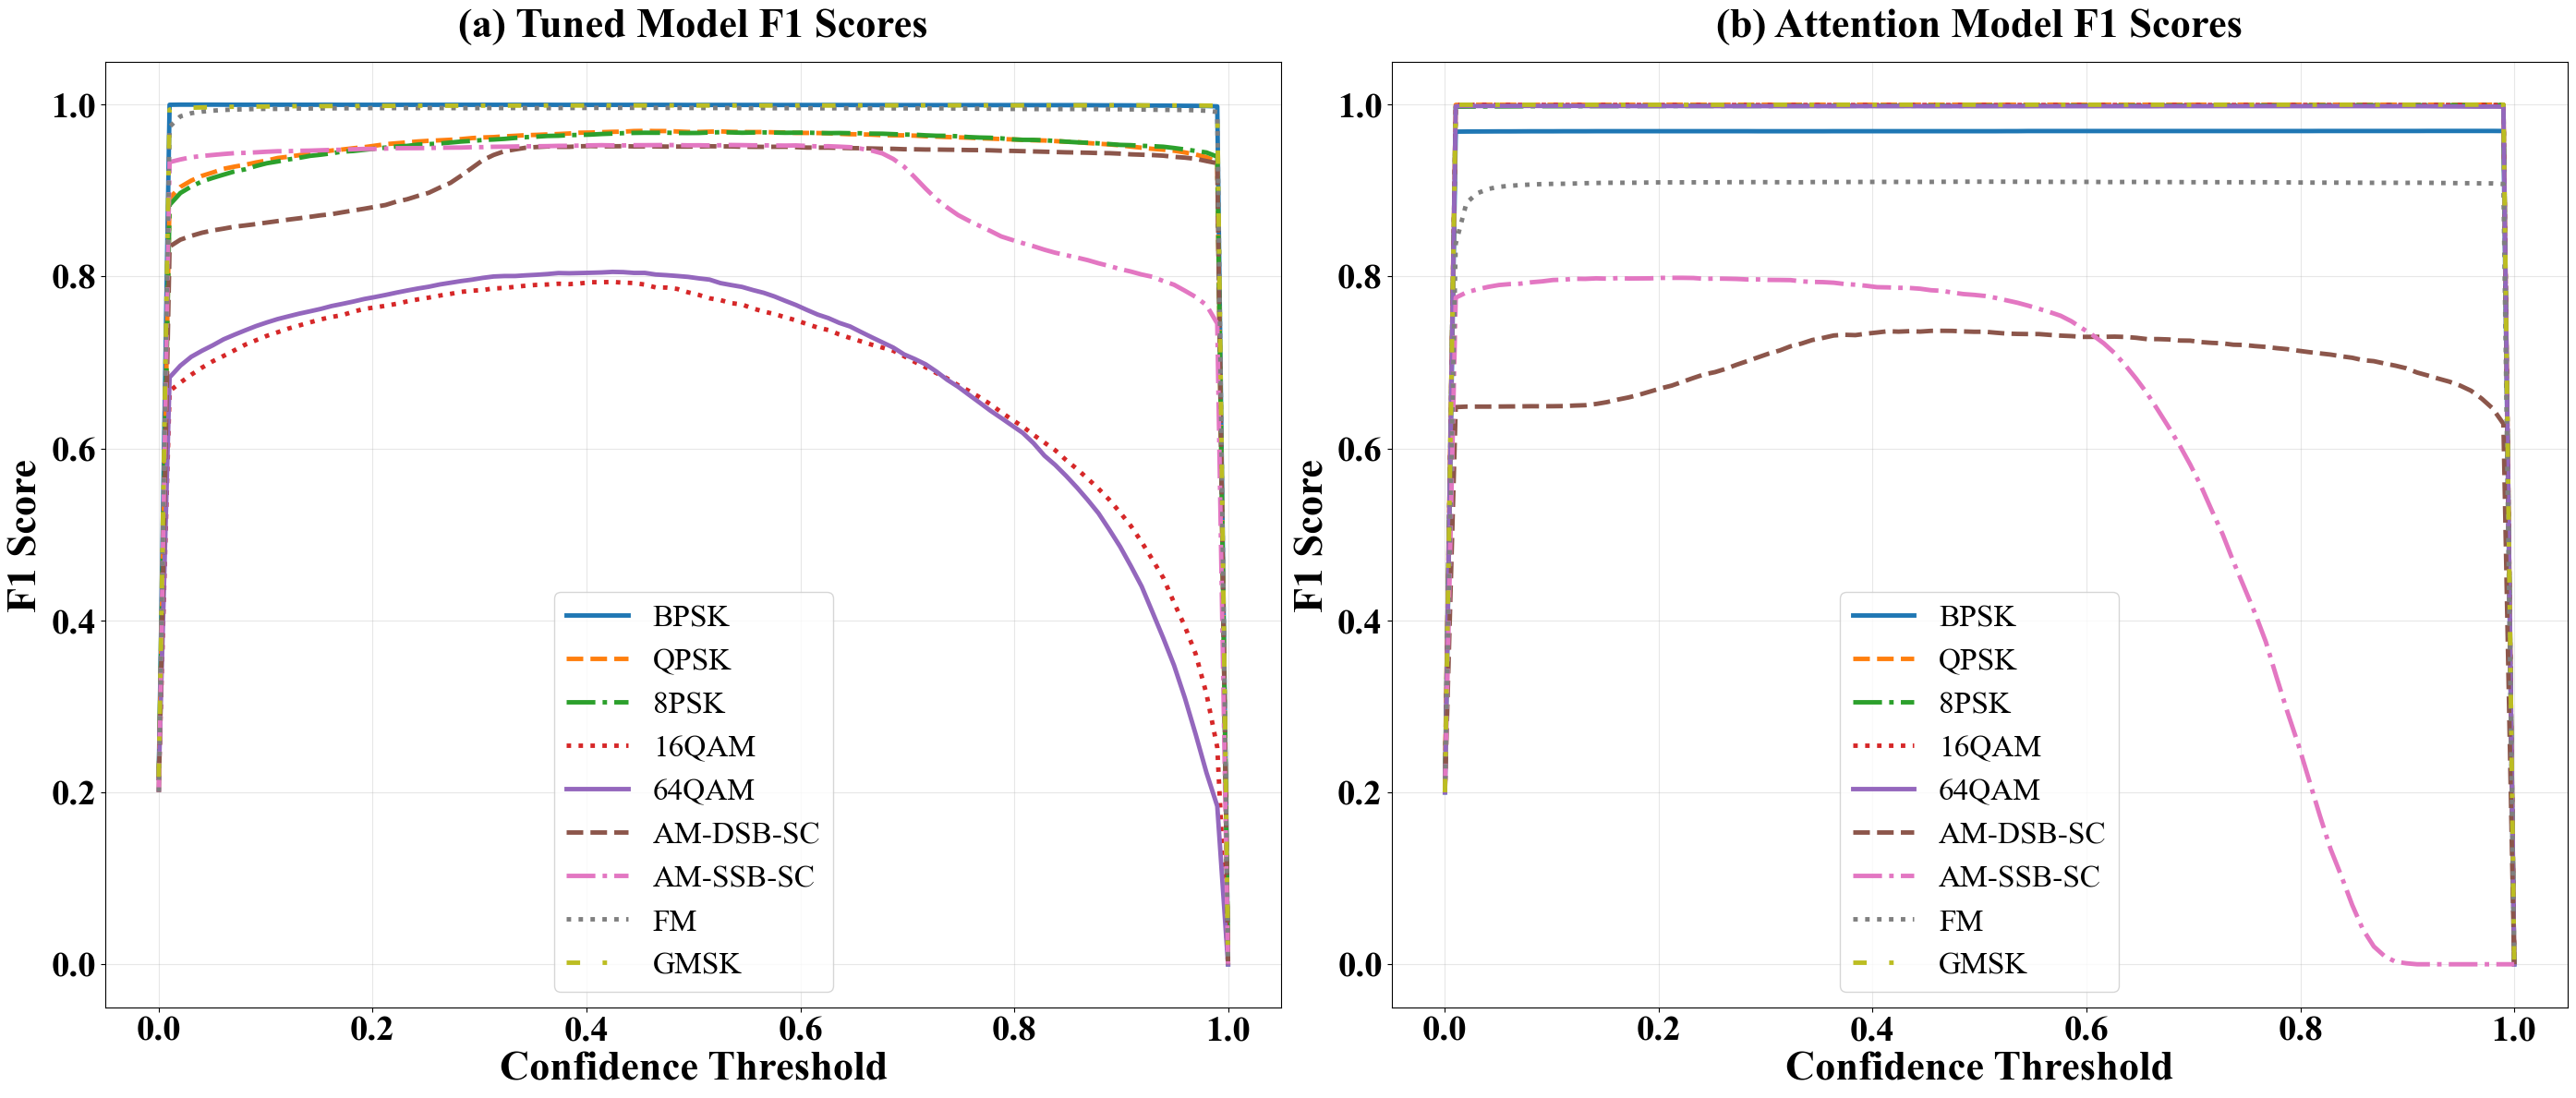

In [17]:
# F1 Score vs Confidence Threshold Side-by-Side Comparison
thresholds = np.linspace(0, 1, 100)
tuned_f1_scores = np.zeros((num_classes, len(thresholds)))
attn_f1_scores = np.zeros((num_classes, len(thresholds)))

for i, threshold in enumerate(thresholds):
    for j in range(num_classes):
        tuned_preds_thresh = tuned_probs[:, j] > threshold
        tuned_f1_scores[j, i] = f1_score(tuned_labels == j, tuned_preds_thresh)
        
        attn_preds_thresh = attn_probs[:, j] > threshold
        attn_f1_scores[j, i] = f1_score(attn_labels == j, attn_preds_thresh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12))

# Tuned Model F1 Score
for i in range(num_classes):
    ax1.plot(thresholds, tuned_f1_scores[i], label=f'{classes[i]}', 
             linestyle=line_styles[i % len(line_styles)], lw=3.5)
ax1.tick_params(axis='both', labelsize=28)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
ax1.legend(loc="best", fontsize=24)
ax1.set_xlabel('Confidence Threshold', fontsize=32, fontweight='bold')
ax1.set_ylabel('F1 Score', fontsize=32, fontweight='bold')
ax1.set_title('(a) Tuned Model F1 Scores', fontsize=32, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)

# Attention Model F1 Score
for i in range(num_classes):
    ax2.plot(thresholds, attn_f1_scores[i], label=f'{classes[i]}', 
             linestyle=line_styles[i % len(line_styles)], lw=3.5)
ax2.tick_params(axis='both', labelsize=28)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')
ax2.legend(loc="best", fontsize=24)
ax2.set_xlabel('Confidence Threshold', fontsize=32, fontweight='bold')
ax2.set_ylabel('F1 Score', fontsize=32, fontweight='bold')
ax2.set_title('(b) Attention Model F1 Scores', fontsize=32, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}comparison_f1_scores.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}comparison_f1_scores.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(f'{OUTPUT_DIR}comparison_f1_scores.svg', format='svg', bbox_inches='tight')
plt.show()

In [18]:
# Print performance metrics comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("="*60)
print("TUNED MODEL PERFORMANCE")
print("="*60)
tuned_accuracy = accuracy_score(tuned_labels, tuned_preds)
tuned_precision = precision_score(tuned_labels, tuned_preds, average='macro')
tuned_recall = recall_score(tuned_labels, tuned_preds, average='macro')
tuned_f1 = f1_score(tuned_labels, tuned_preds, average='macro')

print(f"Accuracy:  {tuned_accuracy*100:.2f}%")
print(f"Precision: {tuned_precision*100:.2f}%")
print(f"Recall:    {tuned_recall*100:.2f}%")
print(f"F1 Score:  {tuned_f1*100:.2f}%")

print("\n" + "="*60)
print("ATTENTION MODEL PERFORMANCE")
print("="*60)
attn_accuracy = accuracy_score(attn_labels, attn_preds)
attn_precision = precision_score(attn_labels, attn_preds, average='macro')
attn_recall = recall_score(attn_labels, attn_preds, average='macro')
attn_f1 = f1_score(attn_labels, attn_preds, average='macro')

print(f"Accuracy:  {attn_accuracy*100:.2f}%")
print(f"Precision: {attn_precision*100:.2f}%")
print(f"Recall:    {attn_recall*100:.2f}%")
print(f"F1 Score:  {attn_f1*100:.2f}%")

print("\n" + "="*60)
print("IMPROVEMENT (Attention vs Tuned)")
print("="*60)
print(f"Accuracy:  {(attn_accuracy - tuned_accuracy)*100:+.2f}%")
print(f"Precision: {(attn_precision - tuned_precision)*100:+.2f}%")
print(f"Recall:    {(attn_recall - tuned_recall)*100:+.2f}%")
print(f"F1 Score:  {(attn_f1 - tuned_f1)*100:+.2f}%")

TUNED MODEL PERFORMANCE
Accuracy:  93.48%
Precision: 93.53%
Recall:    93.48%
F1 Score:  93.45%

ATTENTION MODEL PERFORMANCE
Accuracy:  93.34%
Precision: 93.56%
Recall:    93.34%
F1 Score:  93.22%

IMPROVEMENT (Attention vs Tuned)
Accuracy:  -0.14%
Precision: +0.04%
Recall:    -0.14%
F1 Score:  -0.23%
